In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind


In [26]:
df = pd.read_csv('/Users/sravankumarshaga/Desktop/Team wine/cleaned datasets/Vino_Combined.csv')

In [29]:
df

,Winery,Order Number,Date,Order Value,Taxes,Shipping,Type,Payment Type,Discount Code,Email,...,ID,Name,SKU,UPC,Unit Price,Quantity,Discount,Net Sale,Multi-Pack SKU,Multi-Pack Qty
0,Effingham,82802444044,9/2/22,85.0,3.14,22.32,WINE_CLUB,VISA,NaN,christiramey@hotmail.com,...,87227.0,2020 Petit Verdot,NaN,NaN,44.0,1.0,-9.04,34.96,NaN,NaN
1,Effingham,82802444044,9/2/22,85.0,3.14,22.32,WINE_CLUB,VISA,NaN,christiramey@hotmail.com,...,92179.0,2020 Viognier,NaN,NaN,29.0,1.0,-5.97,23.03,NaN,NaN
2,Effingham,82802444044,9/2/22,85.0,3.14,22.32,WINE_CLUB,VISA,NaN,christiramey@hotmail.com,...,96747.0,2020 Merlot,NaN,NaN,34.0,1.0,-6.99,27.01,NaN,NaN
3,Effingham,82852453004,9/7/22,56.0,3.42,23.83,POINT_OF_SALE,VISA,NaN,tomphalon@msn.com,...,34781.0,2019 Kings Ransom,NaN,NaN,44.0,1.0,-22.00,22.00,NaN,NaN
4,Effingham,82852453004,9/7/22,56.0,3.42,23.83,POINT_OF_SALE,VISA,NaN,tomphalon@msn.com,...,41133.0,2018 Merlot,NaN,NaN,34.0,1.0,-17.00,17.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,Pearmund,86412275872CR,8/30/23,-75.0,-3.99,0.00,WINE_CLUB,VISA,NaN,georgetscott67@gmail.com,...,31659.0,2020 Viognier,VS31659,NaN,25.0,-1.0,0.00,-25.00,NaN,NaN
1517,Pearmund,86412275872CR,8/30/23,-75.0,-3.99,0.00,WINE_CLUB,VISA,NaN,georgetscott67@gmail.com,...,72332.0,2022 Sunshine,VS72332,NaN,25.0,-1.0,0.00,-25.00,NaN,NaN
1518,Pearmund,86422277761,8/30/23,237.6,12.59,0.00,CONSUMER,MASTERCARD,NaN,william.h.wilkey@gmail.com,...,116442.0,2019 Pearmund Anniversary Red,VS116442,NaN,44.0,6.0,-26.40,237.60,NaN,NaN
1519,Pearmund,86422277756,8/30/23,132.0,7.00,24.32,CONSUMER,NaN,NaN,jossie1975@gmail.com,...,116442.0,2019 Pearmund Anniversary Red,VS116442,NaN,44.0,3.0,0.00,132.00,NaN,NaN


In [30]:
df = df.dropna(subset=['Winery'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1520
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Winery           1521 non-null   object 
 1   Order Number     1521 non-null   object 
 2   Date             1521 non-null   object 
 3   Order Value      1521 non-null   float64
 4   Taxes            1521 non-null   float64
 5   Shipping         1521 non-null   float64
 6   Type             1521 non-null   object 
 7   Payment Type     1428 non-null   object 
 8   Discount Code    0 non-null      float64
 9   Email            1521 non-null   object 
 10  Phone            1500 non-null   object 
 11  Column1          316 non-null    object 
 12  First Name       1521 non-null   object 
 13  Last Name        1521 non-null   object 
 14  DOB              1518 non-null   object 
 15  _1               435 non-null    object 
 16  First Name_2     1506 non-null   object 
 17  Last Name_3   

<AxesSubplot:>

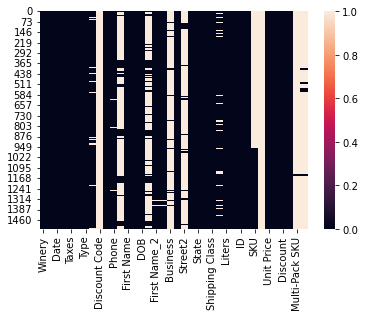

In [32]:
sns.heatmap(df.isnull())

In [33]:
Pearmund_Cellars = df[df['Winery'] == 'Pearmund']
Pearmund_Cellars

,Winery,Order Number,Date,Order Value,Taxes,Shipping,Type,Payment Type,Discount Code,Email,...,ID,Name,SKU,UPC,Unit Price,Quantity,Discount,Net Sale,Multi-Pack SKU,Multi-Pack Qty
6,Pearmund,82902463602,9/12/22,321.6,30.17,44.30,POINT_OF_SALE,VISA,NaN,paiged5090@gmail.com,...,25381.0,2018 Old Vine Chardonnay,NaN,NaN,29.0,1.0,-5.8,23.2,NaN,NaN
7,Pearmund,82902463602,9/12/22,321.6,30.17,44.30,POINT_OF_SALE,VISA,NaN,paiged5090@gmail.com,...,31659.0,2019 Viognier,NaN,NaN,29.0,1.0,-5.8,23.2,NaN,NaN
8,Pearmund,82902463602,9/12/22,321.6,30.17,44.30,POINT_OF_SALE,VISA,NaN,paiged5090@gmail.com,...,31695.0,2017 Petit Verdot Reserve,NaN,NaN,39.0,1.0,-7.8,31.2,NaN,NaN
9,Pearmund,82902463602,9/12/22,321.6,30.17,44.30,POINT_OF_SALE,VISA,NaN,paiged5090@gmail.com,...,32653.0,2017 Black Ops--6th Mission,NaN,NaN,33.0,6.0,-39.6,158.4,NaN,NaN
10,Pearmund,82902463602,9/12/22,321.6,30.17,44.30,POINT_OF_SALE,VISA,NaN,paiged5090@gmail.com,...,36131.0,2021 Petit Manseng,NaN,NaN,29.0,1.0,-5.8,23.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Pearmund,86412275872CR,8/30/23,-75.0,-3.99,0.00,WINE_CLUB,VISA,NaN,georgetscott67@gmail.com,...,25393.0,2020 Ameritage Reserve,VS25393,NaN,25.0,-1.0,0.0,-25.0,NaN,NaN
1516,Pearmund,86412275872CR,8/30/23,-75.0,-3.99,0.00,WINE_CLUB,VISA,NaN,georgetscott67@gmail.com,...,31659.0,2020 Viognier,VS31659,NaN,25.0,-1.0,0.0,-25.0,NaN,NaN
1517,Pearmund,86412275872CR,8/30/23,-75.0,-3.99,0.00,WINE_CLUB,VISA,NaN,georgetscott67@gmail.com,...,72332.0,2022 Sunshine,VS72332,NaN,25.0,-1.0,0.0,-25.0,NaN,NaN
1518,Pearmund,86422277761,8/30/23,237.6,12.59,0.00,CONSUMER,MASTERCARD,NaN,william.h.wilkey@gmail.com,...,116442.0,2019 Pearmund Anniversary Red,VS116442,NaN,44.0,6.0,-26.4,237.6,NaN,NaN


In [34]:
Effingham_Manor = df[df['Winery'] == 'Effingham']
Effingham_Manor

,Winery,Order Number,Date,Order Value,Taxes,Shipping,Type,Payment Type,Discount Code,Email,...,ID,Name,SKU,UPC,Unit Price,Quantity,Discount,Net Sale,Multi-Pack SKU,Multi-Pack Qty
0,Effingham,82802444044,9/2/22,85.0,3.14,22.32,WINE_CLUB,VISA,NaN,christiramey@hotmail.com,...,87227.0,2020 Petit Verdot,NaN,NaN,44.0,1.0,-9.04,34.96,NaN,NaN
1,Effingham,82802444044,9/2/22,85.0,3.14,22.32,WINE_CLUB,VISA,NaN,christiramey@hotmail.com,...,92179.0,2020 Viognier,NaN,NaN,29.0,1.0,-5.97,23.03,NaN,NaN
2,Effingham,82802444044,9/2/22,85.0,3.14,22.32,WINE_CLUB,VISA,NaN,christiramey@hotmail.com,...,96747.0,2020 Merlot,NaN,NaN,34.0,1.0,-6.99,27.01,NaN,NaN
3,Effingham,82852453004,9/7/22,56.0,3.42,23.83,POINT_OF_SALE,VISA,NaN,tomphalon@msn.com,...,34781.0,2019 Kings Ransom,NaN,NaN,44.0,1.0,-22.00,22.00,NaN,NaN
4,Effingham,82852453004,9/7/22,56.0,3.42,23.83,POINT_OF_SALE,VISA,NaN,tomphalon@msn.com,...,41133.0,2018 Merlot,NaN,NaN,34.0,1.0,-17.00,17.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,Effingham,86422277365,8/30/23,85.0,7.65,25.31,WINE_CLUB,MASTERCARD,NaN,dwr35997@gmail.com,...,113727.0,2020 Tannat,VS113727,NaN,44.0,1.0,-10.61,33.39,NaN,NaN
1512,Effingham,86422277339,8/30/23,85.0,7.65,20.98,WINE_CLUB,MASTERCARD,NaN,leiknyrj@gmail.com,...,87678.0,2019 Chardonnay,VS87678,NaN,34.0,1.0,-8.19,25.81,NaN,NaN
1513,Effingham,86422277339,8/30/23,85.0,7.65,20.98,WINE_CLUB,MASTERCARD,NaN,leiknyrj@gmail.com,...,95802.0,2021 Rose,VS95802,NaN,34.0,1.0,-8.20,25.80,NaN,NaN
1514,Effingham,86422277339,8/30/23,85.0,7.65,20.98,WINE_CLUB,MASTERCARD,NaN,leiknyrj@gmail.com,...,113727.0,2020 Tannat,VS113727,NaN,44.0,1.0,-10.61,33.39,NaN,NaN


In [35]:




# Code for Pearmund_Cellars
wine_purchase_pearmund = Pearmund_Cellars.groupby(['State'])['Quantity'].sum().sort_values(ascending=False)
top_state_pearmund = wine_purchase_pearmund.rename_axis('State').reset_index(name='Quantity')
top_state_pearmund.index += 1 

# Code for Effingham_Manor
wine_purchase_effingham = Effingham_Manor.groupby(['State'])['Quantity'].sum().sort_values(ascending=False)
top_state_effingham = wine_purchase_effingham.rename_axis('State').reset_index(name='Quantity')
top_state_effingham.index += 1 

# Concatenate DataFrames horizontally
result = pd.concat([top_state_pearmund, top_state_effingham], axis=1)




print("\033[1mPearmund Cellars\tEffingham Manor\n   Top Wine\t            Top Wine \nPurchased States\tPurchased States\n9-1-2022 - 9-1-2023\t9-1-2022 - 9-1-2023\n\033[0m")

print(result)


Pearmund Cellars	Effingham Manor
   Top Wine	            Top Wine 
Purchased States	Purchased States
9-1-2022 - 9-1-2023	9-1-2022 - 9-1-2023

   State  Quantity State  Quantity
1     FL     318.0    FL     172.0
2     TX     164.0    TX      48.0
3     CO     127.0    MD      35.0
4     MD      88.0    SC      31.0
5     PA      82.0    NC      27.0
6     WA      76.0    CO      27.0
7     VA      74.0    OR      24.0
8     NY      73.0    ME      18.0
9     SC      71.0    PA      18.0
10    NC      67.0    OH      15.0
11    GA      55.0    TN      12.0
12    MA      47.0    KS      12.0
13    AZ      47.0    MO      12.0
14    LA      42.0    AZ       9.0
15    OH      27.0    VA       9.0
16    ME      24.0    NY       9.0
17    ID      24.0    WI       6.0
18    DC      19.0    NV       6.0
19    HI      16.0    LA       6.0
20    WI      15.0    IL       6.0
21    IL      14.0    DC       6.0
22    TN      12.0    GA       4.0
23    MO      12.0    WA       3.0
24    MN      12.0

In [36]:
# Code for Pearmund_Cellars
wine_purchase_pearmund = Pearmund_Cellars.groupby(['State', 'City'])['Quantity'].sum().sort_values(ascending=False)
top_city_pearmund = wine_purchase_pearmund.rename_axis(['State', 'City']).reset_index(name='Quantity')
top_city_pearmund.index += 1 

# Code for Effingham_Manor
wine_purchase_effingham = Effingham_Manor.groupby(['State', 'City'])['Quantity'].sum().sort_values(ascending=False)
top_city_effingham = wine_purchase_effingham.rename_axis(['State', 'City']).reset_index(name='Quantity')
top_city_effingham.index += 1 



print("\033[1m\tPearmund Cellars\n\tTop Wine Purchased States\n\t9-1-2022 - 9-1-2023\033[0m\n")

print(top_city_pearmund)

print("\033[1m\tEffingham_Manor\n\tTop Wine Purchased States\n\t9-1-2022 - 9-1-2023\033[0m\n")

print(top_city_effingham)


	Pearmund Cellars
	Top Wine Purchased States
	9-1-2022 - 9-1-2023

    State            City  Quantity
1      FL    Jacksonville      48.0
2      TX          Austin      45.0
3      FL  Lakewood Ranch      39.0
4      VA       Broad Run      39.0
5      CO     Castle Rock      36.0
..    ...             ...       ...
150    FL     Panama City       1.0
151    WV       Hurricane       1.0
152    ME        Arrowsic       0.0
153    PA      Pittsburgh       0.0
154    SC      Charleston       0.0

[154 rows x 3 columns]
	Effingham_Manor
	Top Wine Purchased States
	9-1-2022 - 9-1-2023

   State            City  Quantity
1     FL  Lakewood Ranch      84.0
2     OR      Baker City      24.0
3     FL       Inverness      24.0
4     FL       Melbourne      24.0
5     SC     Summerville      16.0
..   ...             ...       ...
61    NM          Clovis       3.0
62    NY         Buffalo       3.0
63    MO         Pontiac       3.0
64    MD     Catonsville       2.0
65    TX       Harlingen  

In [39]:
# Code for Pearmund_Cellars
wine_purchase_pearmund = Pearmund_Cellars.groupby(['State','Name'])['Quantity'].sum().sort_values(ascending=False)
top_wine_pearmund = wine_purchase_pearmund.rename_axis(['State', 'Wine_Name']).reset_index(name='Quantity')
top_wine_pearmund.index += 1 

# Code for Effingham_Manor
wine_purchase_effingham = Effingham_Manor.groupby(['State', 'Name'])['Quantity'].sum().sort_values(ascending=False)
top_wine_effingham = wine_purchase_effingham.rename_axis(['State', 'Wine_Name']).reset_index(name='Quantity')
top_wine_effingham.index += 1 



print("\033[1m\tPearmund Cellars\n\tTop Wine Purchased for each State\n\t9-1-2022 - 9-1-2023\033[0m\n")

print(top_wine_pearmund)

print("\033[1m\tEffingham_Manor\n\tTop Wine Purchased for each State\n\t9-1-2022 - 9-1-2023\033[0m\n")

print(top_wine_effingham)


	Pearmund Cellars
	Top Wine Purchased for each State
	9-1-2022 - 9-1-2023

    State                        Wine_Name  Quantity
1      FL      2019 Black Ops--7th Mission      71.0
2      FL         2018 Old Vine Chardonnay      37.0
3      TX      2019 Black Ops--7th Mission      35.0
4      FL                   2018 Ameritage      29.0
5      CO      2019 Black Ops--7th Mission      28.0
..    ...                              ...       ...
340    MO                    2022 Sunshine       1.0
341    NC                    2015 Rielsing       1.0
342    NC                   2019 Ameritage       1.0
343    NC  2019 Cabernet Sauvignon Reserve       1.0
344    WV      2019 Black Ops--7th Mission       1.0

[344 rows x 3 columns]
	Effingham_Manor
	Top Wine Purchased for each State
	9-1-2022 - 9-1-2023

    State            Wine_Name  Quantity
1      FL    2019 Kings Ransom      97.0
2      FL          2019 Tannat      13.0
3      OR    2019 Kings Ransom      12.0
4      OR     2021 Celebrat

In [41]:
# Code for Pearmund_Cellars
wine_purchase_pearmund = Pearmund_Cellars.groupby(['Name'])['Quantity'].sum().sort_values(ascending=False)
top_wine_pearmund = wine_purchase_pearmund.rename_axis(['Wine_Name']).reset_index(name='Quantity')
top_wine_pearmund.index += 1 

# Code for Effingham_Manor
wine_purchase_effingham = Effingham_Manor.groupby(['Name'])['Quantity'].sum().sort_values(ascending=False)
top_wine_effingham = wine_purchase_effingham.rename_axis(['Wine_Name']).reset_index(name='Quantity')
top_wine_effingham.index += 1 



print("\033[1m\tPearmund Cellars\n\tTop Wine Purchases\n\t9-1-2022 - 9-1-2023\033[0m\n")

print(top_wine_pearmund)

print("\033[1m\tEffingham_Manor\n\tTop Wine Purchases\n\t9-1-2022 - 9-1-2023\033[0m\n")

print(top_wine_effingham)


	Pearmund Cellars
	Top Wine Purchases
	9-1-2022 - 9-1-2023

                          Wine_Name  Quantity
1       2019 Black Ops--7th Mission     249.0
2                    2018 Ameritage     146.0
3       2019 Cabernet Franc Reserve     118.0
4                2021 Petit Manseng     109.0
5          2018 Old Vine Chardonnay     105.0
6               2019 Cabernet Franc     104.0
7            2020 Ameritage Reserve      85.0
8               2021 Wine Club Rose      84.0
9                     2021 Sunshine      80.0
10                2020 Petit Verdot      74.0
11                2019 Petit Verdot      59.0
12                    2020 Viognier      55.0
13                    2022 Sunshine      50.0
14  2018 Cabernet Sauvignon Reserve      41.0
15                    2019 Viognier      37.0
16            2022 Pearl Chardonnay      25.0
17                   2019 Ameritage      17.0
18                      2019 Merlot      16.0
19    2019 Pearmund Anniversary Red      14.0
20         2019 Old 

In [52]:

# Convert 'Date' column to datetime format
Pearmund_Cellars.loc[:, 'Date'] = pd.to_datetime(Pearmund_Cellars['Date'])
Effingham_Manor.loc[:, 'Date'] = pd.to_datetime(Effingham_Manor['Date'])

# Extract year and month from the 'Date' column
Pearmund_Cellars.loc[:, 'Year'] = Pearmund_Cellars['Date'].dt.year
Pearmund_Cellars.loc[:, 'Month'] = Pearmund_Cellars['Date'].dt.strftime('%B %Y')

Effingham_Manor.loc[:, 'Year'] = Effingham_Manor['Date'].dt.year
Effingham_Manor.loc[:, 'Month'] = Effingham_Manor['Date'].dt.strftime('%B %Y')


# Group by year and month and sum the quantity
wine_purchase_pearmund_monthly = Pearmund_Cellars.groupby(['Year', 'Month'])['Quantity'].sum()
wine_purchase_effingham_monthly = Effingham_Manor.groupby(['Year', 'Month'])['Quantity'].sum()

# Concatenate the results
result_monthly = pd.concat([wine_purchase_pearmund_monthly, wine_purchase_effingham_monthly], axis=1)
result_monthly.columns = ['Pearmund Cellars', 'Effingham Manor']

# Print the monthly analysis
print("\nMonthly Analysis")
print(result_monthly)




Monthly Analysis
                     Pearmund Cellars  Effingham Manor
Year Month                                            
2022 December 2022              133.0             72.0
     November 2022              344.0            100.0
     October 2022                96.0             48.0
     September 2022              58.0             30.0
2023 April 2023                  52.0              6.0
     August 2023                185.0             57.0
     February 2023              245.0             21.0
     January 2023                48.0             20.0
     July 2023                   30.0              3.0
     June 2023                   47.0             33.0
     March 2023                  46.0             58.0
     May 2023                   245.0             67.0
     September 2023               NaN              3.0


/Users/sravankumarshaga/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/sravankumarshaga/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [54]:


# Group by year, month, and state and sum the quantity
wine_purchase_pearmund_monthly = Pearmund_Cellars.groupby(['Year', 'Month', 'State'])['Quantity'].sum()
wine_purchase_effingham_monthly = Effingham_Manor.groupby(['Year', 'Month', 'State'])['Quantity'].sum()

# Concatenate the results
result_monthly = pd.concat([wine_purchase_pearmund_monthly, wine_purchase_effingham_monthly], axis=1)
result_monthly.columns = ['Pearmund Cellars', 'Effingham Manor']


result_monthly = result_monthly.fillna(0)

# Print the monthly analysis
print("\nMonthly Analysis")
print(result_monthly.to_string())



Monthly Analysis
                           Pearmund Cellars  Effingham Manor
Year Month          State                                   
2022 December 2022  AZ                  6.0              3.0
                    DC                 12.0              0.0
                    FL                 18.0              3.0
                    GA                  0.0              4.0
                    HI                  4.0              0.0
                    IL                  0.0              3.0
                    IN                 12.0              0.0
                    LA                 15.0              0.0
                    MA                 10.0              0.0
                    MD                 20.0              3.0
                    ME                  3.0              6.0
                    MN                 12.0              0.0
                    MO                  0.0             12.0
                    NC                  7.0              0.0
      

In [16]:

# Group by year, month, and state and sum the quantity
wine_purchase_pearmund_monthly = Pearmund_Cellars.groupby(['Year', 'Month', 'City'])['Quantity'].sum()
wine_purchase_effingham_monthly = Effingham_Manor.groupby(['Year', 'Month', 'City'])['Quantity'].sum()

# Concatenate the results
result_monthly = pd.concat([wine_purchase_pearmund_monthly, wine_purchase_effingham_monthly], axis=1)
result_monthly.columns = ['Pearmund Cellars', 'Effingham Manor']

result_monthly = result_monthly.fillna(0)

# Print the monthly analysis
print("\nMonthly Analysis")
print(result_monthly.to_string())



Monthly Analysis
                                        Pearmund Cellars  Effingham Manor
Year Month          City                                                 
2022 December 2022  Annapolis                        4.0              0.0
                    BRADENTON                        3.0              0.0
                    Berlin                           0.0              3.0
                    Bloomington                     12.0              0.0
                    Brookhaven                       0.0              4.0
                    Buffalo                          0.0              3.0
                    Cape Elizabeth                   0.0              6.0
                    Cary                             2.0              0.0
                    Dallas                           0.0              3.0
                    Davenport                        2.0              0.0
                    ELLICOTT CITY                    4.0              0.0
                    